# ASSIGNMENT 4

In [61]:
import warnings 

warnings.filterwarnings("ignore")

In [62]:
import pandas as pd

In [63]:
data= pd.read_csv("haberman.csv")

In [64]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**There are 3 independent variables: age,year and nodes, 1 dependent variable: status.
Attributes:
age: age of patient
year: time of surgery
nodes: lymph nodes in the body
status: 1 if the patient survides>=5 years and 2 otherwise.**

**Objective: Given the patient's age, year and no of nodes, one has to predict whether the patient survived for more than or equal to 5 years or not.**

In [66]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**1. There are a total of 306 rows of data.**

**2. Mean age of patients is 52.**

**3. Min age is 30 while max age is 83.**

**4. There is no missing data for any of the features since the count is same(not so confident since i dont know if there is a null value, would that be counted or not)**

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


**The above confirms that there is no null value in the dataset.**

In [69]:
data.status.value_counts()

1    225
2     81
Name: status, dtype: int64

**This is an imbalanced dataset as there are 225 cases of survival of patient and 81 cases of death.**

In [71]:
data.nodes.value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

**Patients with 0 nodes are max in the dataset so there might be a bias of low node value as "136" and the effect of patients with 1 or 2 nodes might be less.**

In [72]:
data[["age", "status"]][data["nodes"]==0].head()

,age,status
2,30,1
6,33,1
7,34,2
13,34,1
15,35,1


**From the above it seems like there is no specific age group that might have 0 nodes**

In [73]:
spe=data[["age", "status"]][data["nodes"]==0]

In [74]:
spe.status.value_counts()

1    117
2     19
Name: status, dtype: int64

**From the above we can say that most of the patients with 0 nodes survived.**

# Plots

In [75]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# 2D Scatter Plot

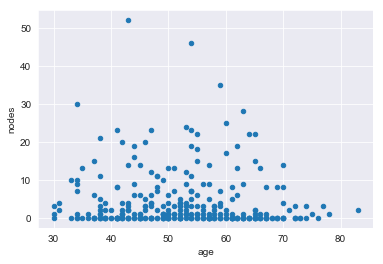

In [76]:
import matplotlib.pyplot as plt
data.plot(x='age', y='nodes', kind='scatter')
plt.show()

**From the above plot all I can say is that most patients have 0 nodes.**

In [77]:
import seaborn as sbn

# 2D Scatter Plot with Color Coding of Survival Status

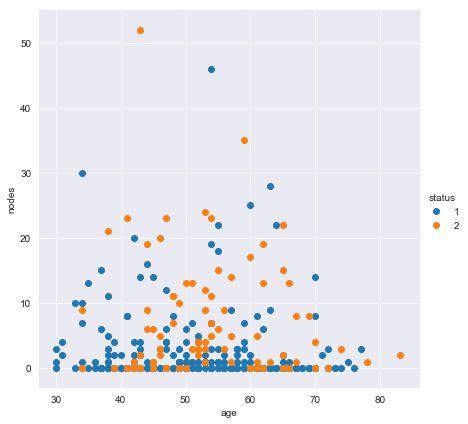

In [78]:
sbn.set_style("darkgrid")
sbn.FacetGrid(data= data, hue="status", size=6).map(plt.scatter, "age", "nodes").add_legend();
plt.show();

**From the above data I cannot make much sense of it. The patients with age below 40 have more survival rate.**

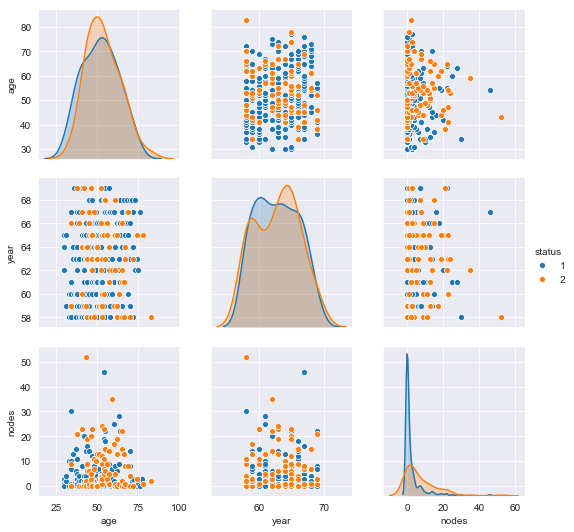

In [79]:
sbn.set_style("darkgrid")
sbn.pairplot(data=data, hue="status", vars=["age", "year","nodes"])
plt.show()

**The above plots don't give much information.**

In [80]:
alive= data[data["status"]==1]

In [81]:
alive.shape

(225, 4)

In [82]:
dead= data[data["status"]==2]

In [83]:
dead.shape

(81, 4)

In [84]:
alive.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [85]:
import numpy as np

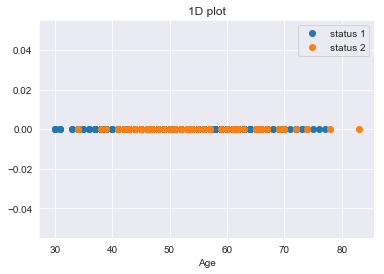

In [86]:
plt.plot(alive['age'], np.zeros_like(alive['age']),'o', label= "status 1", )
plt.plot(dead['age'], np.zeros_like(dead['age']),'o', label= "status 2")
plt.legend()
plt.xlabel("Age")
plt.title("1D plot")
plt.show()

**Overlapping points so the above plot is useless.**

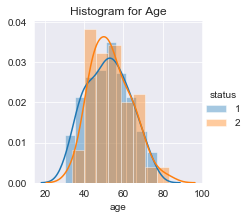

In [87]:
sbn.FacetGrid(data=data, hue='status').map(sbn.distplot,"age").add_legend()
plt.title("Histogram for Age")
plt.show()

**From the above plot there is no specific pattern to be seen. So I will consider it as useless.**

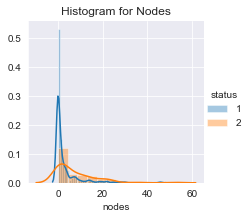

In [88]:
sbn.FacetGrid(data=data, hue='status').map(sbn.distplot,"nodes").add_legend()
plt.title("Histogram for Nodes")
plt.show()

**As observed before the patients with low nodes survived.**

# Pseudo code:
**if nodes<2:**

   **status=1**
   
**else:**

   **status=2**

In [89]:
count, binedge= np.histogram(alive['nodes'], density=True, bins=10)
pdf=count/sum(count)

In [90]:
cdf= np.cumsum(pdf)

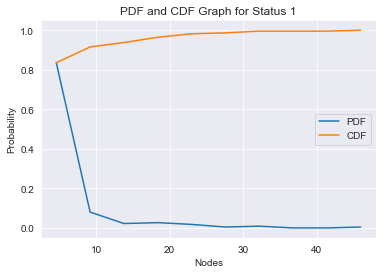

In [91]:
plt.plot(binedge[1:], pdf, label="PDF")
plt.plot(binedge[1:], cdf, label="CDF")
plt.xlabel("Nodes")
plt.ylabel("Probability")
plt.title("PDF and CDF Graph for Status 1")
plt.legend()
plt.show()

**From the above we can say that almost 82% of patients who survived had less than 5 nodes and almost 93% patients survived with less than 10 nodes.**

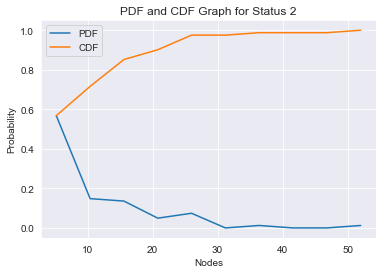

In [92]:
countd, bind= np.histogram(dead['nodes'], density=True, bins=10)
pdfd= countd/sum(countd)
cdfd= np.cumsum(pdfd)
plt.plot(bind[1:],pdfd, label="PDF")
plt.plot(bind[1:], cdfd, label="CDF")
plt.xlabel("Nodes")
plt.ylabel("Probability")
plt.title("PDF and CDF Graph for Status 2")
plt.legend()
plt.show()

**From the above plot we can say that almost 57% patients with less than 5 nodes didnt survive, which contradicts the previous observation. It is perhaps because of imbalanced dataset.**

In [93]:
alive.status.value_counts()

1    225
Name: status, dtype: int64

In [94]:
dead.status.value_counts()

2    81
Name: status, dtype: int64

In [95]:
mean_alive= np.mean(alive['nodes'])
mean_alive_out= np.mean(np.append(alive['nodes'],100))
mean_dead= np.mean(dead['nodes'])

print(mean_alive,mean_alive_out, mean_dead)

2.7911111111111113 3.2212389380530975 7.45679012345679


**As observed before, the patients who survived had less no of nodes which is visible above as they have low mean.
Mean with outlier of 100 affected the mean with 0.5, but I dont know if this change is large or small as I don't have proper domain knowledge.**

In [96]:
std_alive= np.std(alive['nodes'])
std_dead= np.std(dead['nodes'])
print(std_alive,std_dead)

5.857258449412138 9.128776076761635


**From the above we can say that the deviation of survived patients is less than the ones who didnt.**

In [97]:
med_alive= np.median(alive['nodes'])
med_alive_out= np.median(np.append(alive['nodes'], 100))
med_dead= np.median(dead['nodes'])
print(med_alive,med_alive_out, med_dead)

0.0 0.0 4.0


**From the above we can clearly see there is no effect of the outlier. But the patients who didnt survive had a median/average node of 4.**

In [98]:
quant_alive= np.percentile(alive['nodes'], np.arange(0,100,25))
quant_dead= np.percentile(dead['nodes'], np.arange(0,100,25))
print(quant_alive,quant_dead)

[0. 0. 0. 3.] [ 0.  1.  4. 11.]


**For patients who survived, from above we can say that 75% of patients have less than 3 nodes.
For patients who didn't survive, from above we can say that 25% of patients had 1 node, 50% patients had <=4 nodes and 75% of patients had <=11 nodes.**

In [99]:
quant_alive90= np.percentile(alive['nodes'], 90)
quant_dead90= np.percentile(dead['nodes'], 90)
print(quant_alive90,quant_dead90)

8.0 20.0


**From above we can say that 90% of patients who survived had<=8 nodes whereas the ones who didn't had <=20 nodes.**

# Box Plot

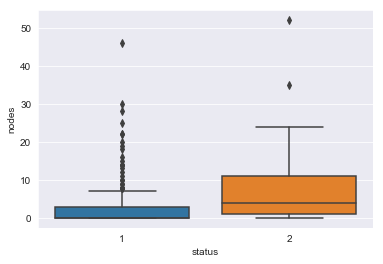

In [100]:
sbn.boxplot(x='status', y='nodes', data=data)
plt.show()

**From the above,once again we can say that the for patients who survived the 75 percentile of them had low node count. The upper range for status 1 is around 8 which means the patients who survived had a max node of 8. There is an outlier of value 46. For the patients who didnt make it we can see that the 75 percentile of them had around 12 nodes and the highest was around 25 excluding the outliers. There is an outlier of value 52.**

# Violen Plot

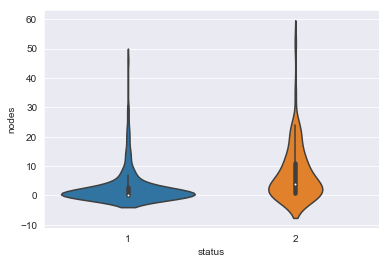

In [101]:
sbn.violinplot(x= 'status', y='nodes', data=data)
plt.show()

**STATUS 1:From the above plot we can say that there a lot of people who had 0 nodes and so the PDF is high at 0. The 75th percentile is also low at 8.
STATUS 2: The node count of 75% of patients is high at around 28 thats why the PDF is spread more vertically.**

# Contour Plot

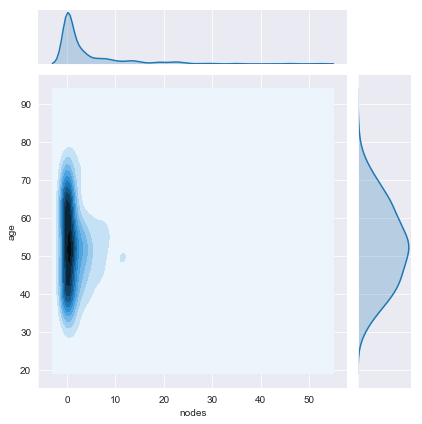

In [102]:
sbn.jointplot(x='nodes',y='age',data=data,kind='kde')
plt.show()

**From the above we can see that there is a lot of depth at node 0, which basically means that there are many patients who dont have any nodes. There is some depth with nodes ranging from 0 to 10. The above also explains the spread of the patients age, varying from 30 to almost 80.**

**CONCLUSION: Keeping the objective in mind, we can say that the patients who had less number of nodes, especially the ones with 0 nodes were able to survive for more than or equal to 5 years. There are 19 cases where the node count was 0 but still the patients couldn't make it.But looking at the analysis, the patients with high node count couldn't make it.**